# Week10_실습과제_우정연

# Dimensionality Reduction Demystified for Beginners

In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
(X_canc, y_canc) = load_breast_cancer(return_X_y = True)

[Helper Functions]

In [ ]:
# A Function to Plot labelled Scatter Plot
def plot_labelled_scatter(X, y, class_labels,s):
    num_labels = len(class_labels)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    marker_array = ['o', '^', '*']
    color_array = ['#FFFF00', '#00AAFF', '#000000', '#FF00AA']
    cmap_bold = ListedColormap(color_array)
    bnorm = BoundaryNorm(np.arange(0, num_labels + 1, 1), ncolors=num_labels)
    plt.figure(figsize=s)

    plt.scatter(X[:, 0], X[:, 1], s=80, c=y, cmap=cmap_bold, norm = bnorm, alpha = 0.4, edgecolor='black', lw = 1)
    sp = plt.gca().spines
    sp['top'].set_visible(False)
    sp['right'].set_visible(False)

    plt.grid(which='both',color='lightslategrey',alpha=0.3)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    h = []
    for c in range(0, num_labels):
        h.append(mpatches.Patch(color=color_array[c], label=class_labels[c]))
    plt.legend(handles=h,fontsize=15,frameon=False)

[Dimensionality Reduction]


- 많은 피처를 적은 차원으로 줄이기
- 데이터셋 파악(연관 정도 등)시 용이


[Types of Simple Dimensionality Reduction Algorithms/Methods]

1. Principle Component Analysis (PCA)
2. Multi-dimensional Scaling (MDS)
3. T-distributed Stochastic Neighbor Embedding (t-SNE)

## **1. Principle Component Analysis (PCA)**

- 데이터 분포를 회전시켜 새로운 기준 축 찾기 -> 회전된 축에서는 데이터의 각 차원들이 상관되지 않음
- 가장 중요한 차원들만 남기고 나머지 차원은 버림
- 남은 차원: 원 데이터에서 대부분의 variation을 설명 가능할 정도로 중요한 차원들

[Using PCA to find the first two Principal Components of the Breast Cancer Dataset]

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Before applying PCA, each feature should be centered (zero mean)
# and with unit variance
# This can be done by using StandardScaler of sklearn Library
canc_norm = StandardScaler().fit(X_canc).transform(X_canc)

pca = PCA(n_components = 2).fit(canc_norm)
# Fitting PCA with 2 Components

canc_pca = pca.transform(canc_norm)

print('Number of Features in Breast Cancer DataSet Before PCA : {}\n\nNumber of Features in Breast Cancer DataSet After PCA :{}'.
      format(X_canc.shape[1],canc_pca.shape[1]))

Number of Features in Breast Cancer DataSet Before PCA : 30

Number of Features in Breast Cancer DataSet After PCA :2


[Plotting the PCA-Transformed Version of the Breast Cancer Dataset]

- 데이터셋의 feature 2개로 줄어듬.
- 몇가지 정보는 잃었지만 feature 간의 관계 더 잘 이해 가능, 시각화 더 단순화

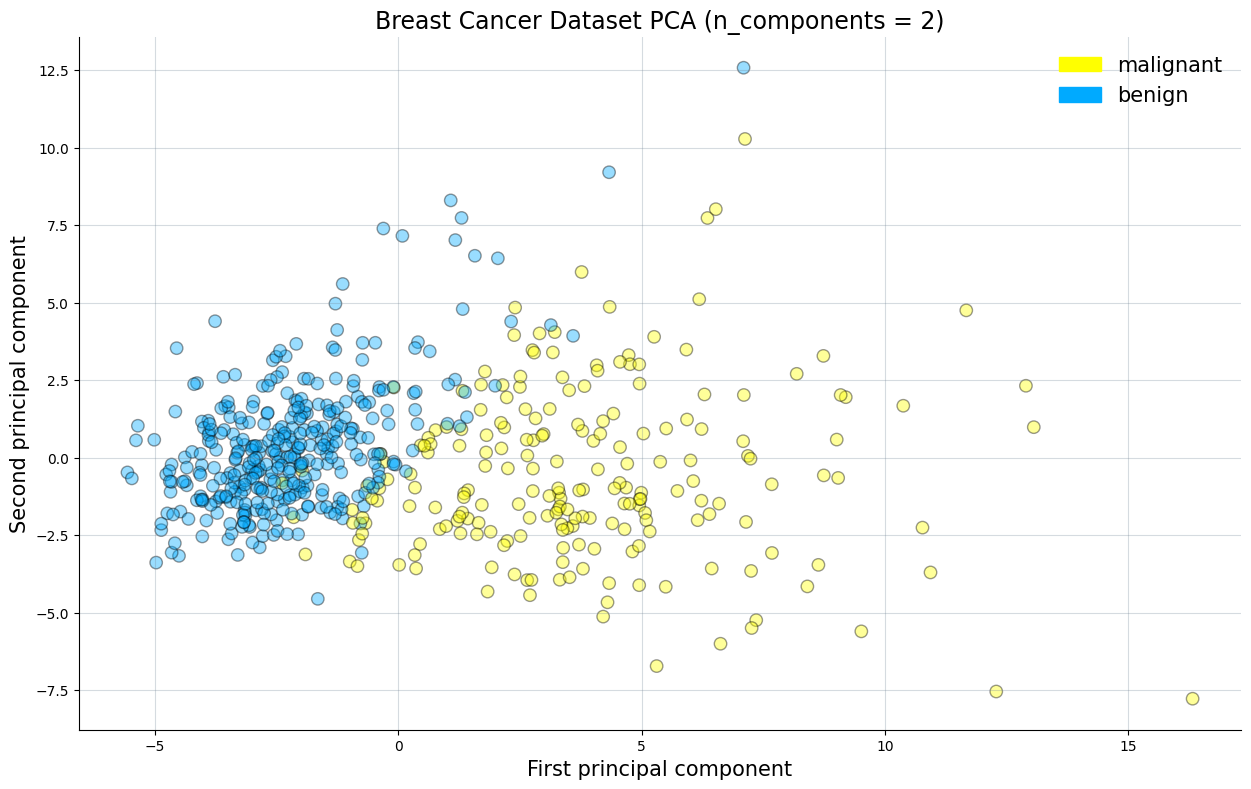

In [ ]:
plot_labelled_scatter(canc_pca, y_canc, ['malignant','benign'],(15,9))
# Using the Helper Function

#Labeling
plt.xlabel('First principal component', fontsize = 15)
plt.ylabel('Second principal component', fontsize = 15)
plt.title('Breast Cancer Dataset PCA (n_components = 2)', fontsize = 17);

- 간단한 logistic regression으로 target class 두개가 나누어질 수 있음
- PCA는 해석하기 쉬운 결과를 줄 뿐만 아니라 분류하기 좋은 결과를 줌

[Using PCA to get feature Co-Relation Between the Initial 30 Features]

- `.components_`: 모든 feature의 variance pair의 co-relation을 나타냄



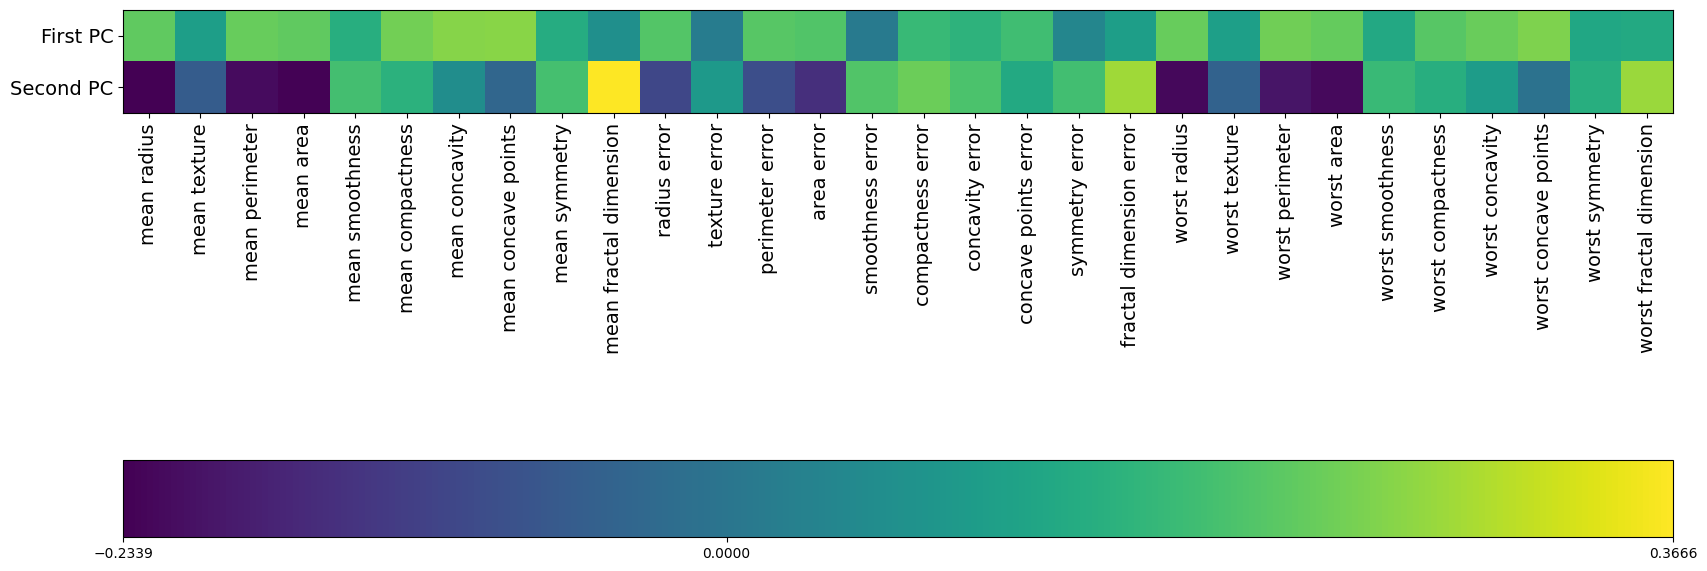

In [ ]:
fig = plt.figure(figsize=(20,9))
plt.imshow(pca.components_, interpolation = 'none', cmap = 'viridis')
feature_names = list(cancer.feature_names)

plt.gca().set_xticks(np.arange(len(feature_names)));
plt.gca().set_yticks(np.arange(2));
plt.gca().set_xticklabels(feature_names, rotation=90, fontsize=14);
plt.gca().set_yticklabels(['First PC', 'Second PC'], fontsize=14);

plt.colorbar(orientation='horizontal', ticks=[pca.components_.min(), 0,
                                              pca.components_.max()], pad=0.5);

- first principle component는 모두 positive 값.
  - 함께 증가 or 함께 감소하는 경향
- second principle component는 positive 값과 negative 값 섞여 있음.


[Remarks on PCA]
- good initial tool for exploring a dataset.

## **2. Multi-Dimensional Scaling: (MDS)**

- Manifold Learning Algorithms: 고차원 데이터에서 낮은 차원의 구조를 잘 찾을 수 있음 + 시각화에 유용함
  - 예) 'Swiss Role DataSet'
  - Manifold: lower dimensional sheet within a higher dimensional space
- MDS(Multi-Dimensional Scaling): 널리 사용되는 manifold learning method

- Types of MDS
  - goal: to visualize a high dimensional dataset and 'project' it onto a lower dimensional space

[Using MDS on the Breast Cancer Dataset]

Number of Features in Breast Cancer DataSet Before MDS : 30

Number of Features in Breast Cancer DataSet After MDS : 2


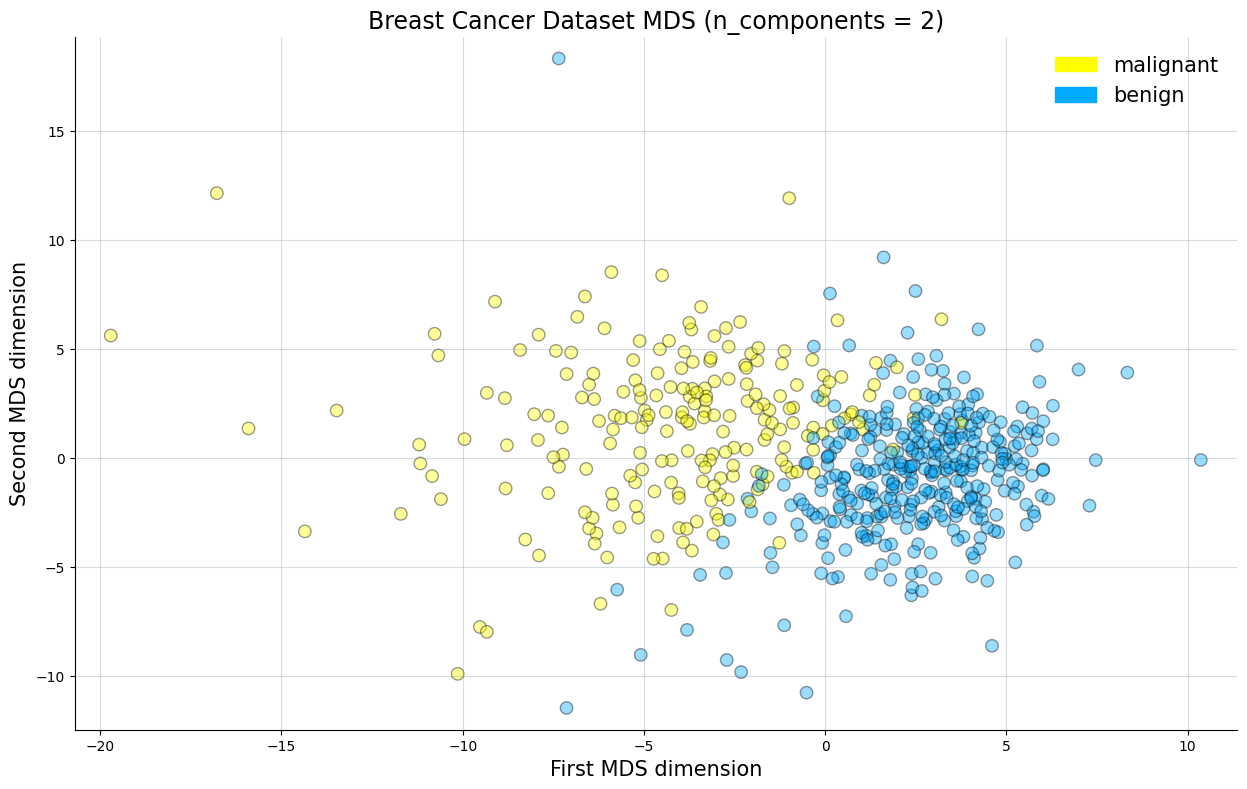

In [ ]:
from sklearn.manifold import MDS

mds = MDS(n_components = 2, random_state = 2)

canc_mds = mds.fit_transform(canc_norm)

print('Number of Features in Breast Cancer DataSet Before MDS : {}\n\nNumber of Features in Breast Cancer DataSet After MDS : {}'.
      format(X_canc.shape[1], canc_mds.shape[1]))

plot_labelled_scatter(canc_mds, y_canc, ['malignant', 'benign'], (15,9))

plt.xlabel('First MDS dimension', fontsize = 15)
plt.ylabel('Second MDS dimension', fontsize = 15)
plt.title('Breast Cancer Dataset MDS (n_components = 2)', fontsize = 17);

[Remarks on MDS]
- PCA와 비슷한 역할을 함
- principles, mathematical models 상이

##**3. T-distributed Stochastic Neighbor Embedding(t-SNE)**

- data visualizing을 위한 강력한 manifold learning algorithm: t-SNE
- 2차원 representation을 찾음
  - 2차원 산점도에서의 점들 간의 거리가 원본 고차원 데이터셋에서의 동일한 점들 간의 거리와 최대한 가깝게 일치하도록

[Using T-SNE on the Breast Cancer Dataset]

Number of Features in Breat Cancer DataSet Before T-SNE : 30

Number of Features in Breast Cancer DataSet After T-SNE : 2


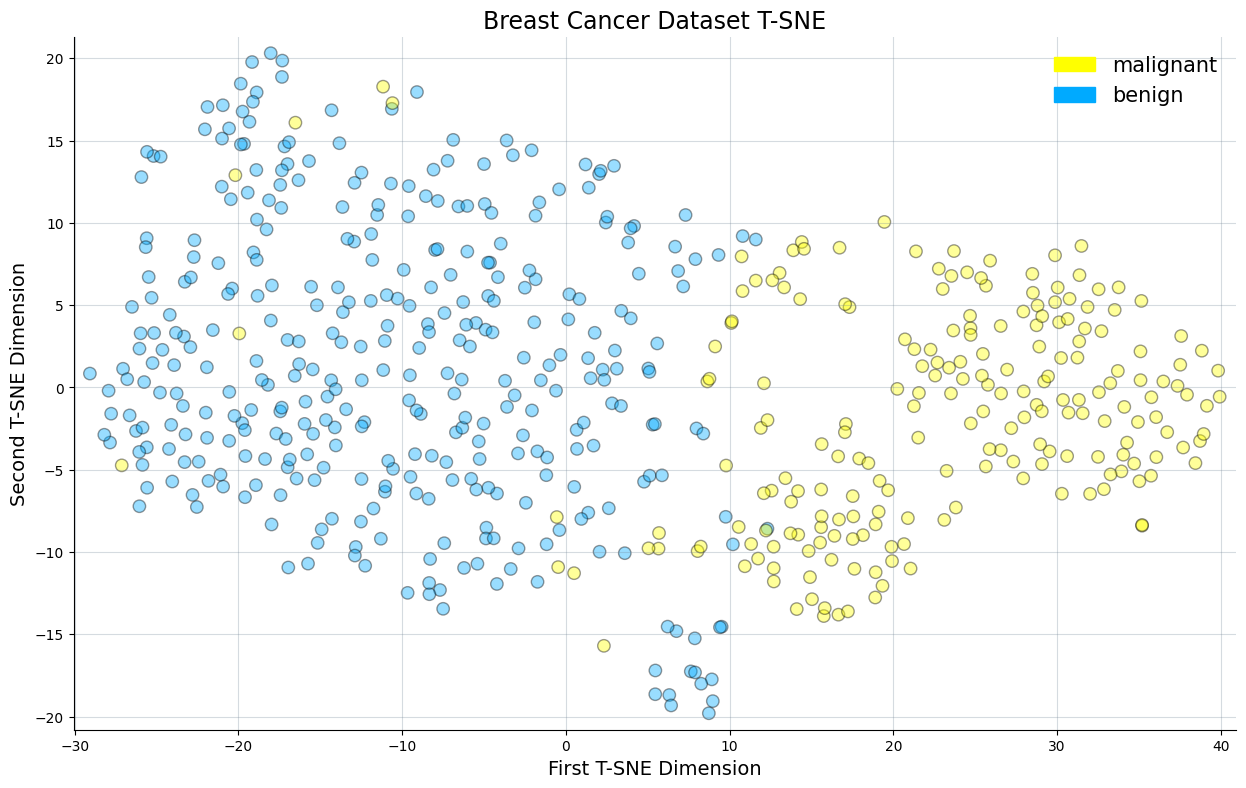

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state = 42)

canc_tsne = tsne.fit_transform(canc_norm)

print('Number of Features in Breat Cancer DataSet Before T-SNE : {}\n\nNumber of Features in Breast Cancer DataSet After T-SNE : {}'
      .format(X_canc.shape[1],canc_tsne.shape[1]))

plot_labelled_scatter(canc_tsne, y_canc, ['malignant', 'benign'],(15,9))

plt.xlabel('First T-SNE Dimension',fontsize=14)
plt.ylabel('Second T-SNE Dimension',fontsize=14)
plt.title('Breast Cancer Dataset T-SNE',fontsize=17);


[Remarks on T-SNE]
- 특정 데이터셋에 어떤 manifold learning이 적합한지 여러가지 접근을 시도해보아야 함.
- clearly defined patterns of neighbors인 경우 T-SNE는 더 잘 작동됨.